<a href="https://colab.research.google.com/github/mggg/Training_Materials_25/blob/main/notebooks/joint/Joint_1_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from votekit import PreferenceProfile
import pickle
from votekit.plots import profile_mentions_plot, multi_bar_plot, profile_ballot_lengths_plot
from votekit.elections import STV
from votekit.utils import first_place_votes, mentions
from votekit.graphs import PairwiseComparisonGraph
from votekit.matrices import matrix_heatmap, boost_matrix, candidate_distance_matrix, comentions_matrix
from io import BytesIO
import geopandas as gpd

In [2]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/Portland_profile_for_visualization.pkl') as response:
    profile = pickle.load(response)

In [3]:
profile

Profile has been cleaned
Profile contains rankings: True
Maximum ranking length: 6
Profile contains scores: False
Candidates: ('Cayle Tern', 'Candace Avalos', 'Doug Clove', 'Noah Ernst', 'Steph Routh', 'Jamie Dunphy', 'Thomas Shervey', 'Michael (Mike) Sands', 'Timur Ender', 'David Linn', 'Peggy Sue Owens', 'Loretta Smith', 'Joe Furi', 'Uncertified Write In', 'Terrence Hayes', 'Deian Salazar', 'Joe Allen')
Candidates who received votes: ('Candace Avalos', 'Cayle Tern', 'Jamie Dunphy', 'Loretta Smith', 'Steph Routh', 'Doug Clove', 'Michael (Mike) Sands', 'David Linn', 'Timur Ender', 'Deian Salazar', 'Peggy Sue Owens', 'Joe Allen', 'Joe Furi', 'Terrence Hayes', 'Noah Ernst', 'Thomas Shervey', 'Uncertified Write In')
Total number of Ballot objects: 19872
Total weight of Ballot objects: 42871

In [4]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/Portland_election_for_visualization.pkl') as response:
    election = pickle.load(response)

In [5]:
election

                          Status  Round
Candace Avalos           Elected     13
Loretta Smith            Elected     16
Jamie Dunphy             Elected     17
Terrence Hayes        Eliminated     15
Noah Ernst            Eliminated     14
Steph Routh           Eliminated     12
Timur Ender           Eliminated     11
Doug Clove            Eliminated     10
Peggy Sue Owens       Eliminated      9
David Linn            Eliminated      8
Joe Allen             Eliminated      7
Michael (Mike) Sands  Eliminated      6
Deian Salazar         Eliminated      5
Cayle Tern            Eliminated      4
Thomas Shervey        Eliminated      3
Joe Furi              Eliminated      2
Uncertified Write In  Eliminated      1

<Axes: >

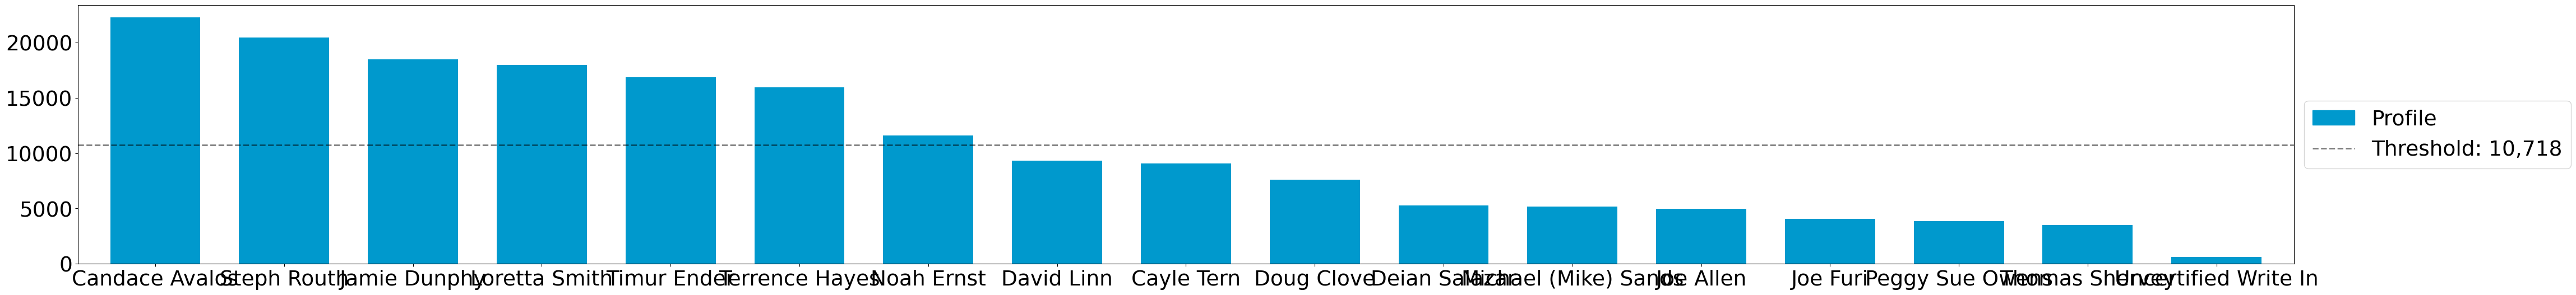

In [6]:
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

### Try it yourself!

Your task is to do each of the following (preferably in order and with only one modification):

1. Edit the axis names
2. Try normalizing the data
3. Change the color of the bars
4. Change the width of the bars
5. Change the order of the bars
6. Try relabeling the candidates with integers
7. Change the legend font size
8. Play around with the legend location

Parameters for `profile_mentions_plot`:

- `profile` (PreferenceProfile): Profile to plot statistics for.
- `profile_label` (str, optional): Label for profile. Defaults to "Profile". 
- `mentions_kwds` (dict[str, Any], optional): Keyword arguments to pass to
    ``mentions``. Defaults to None, in which case default values for ``mentions``
    are used.
- `normalize` (bool, optional): Whether or not to normalize data. Defaults to False.
- `profile_color` (str, optional): Color to plot. Defaults to the first color from
    ``COLOR_LIST`` from ``utils`` module.
- `bar_width` (float, optional): Width of bars. Defaults to None which computes the bar width
    as 0.7 divided by the number of data sets. Must be in the interval `(0,1]`.
- `candidate_ordering` (list[str], optional): Ordering of x-labels. Defaults to decreasing
    order of mentions.
- `x_axis_name` (str, optional): Name of x-axis. Defaults to None, which does not plot a name.
- `y_axis_name` (str, optional): Name of y-axis. Defaults to None, which does not plot a name.
- `title` (str, optional): Title for the figure. Defaults to None, which does not plot a title.
- `show_profile_legend` (bool, optional): Whether or not to plot the profile legend.
    Defaults to False. Is automatically shown if any threshold lines have the keyword
    "label" passed through ``threshold_kwds``.
- `candidate_legend` (dict[str, str], optional): Dictionary mapping candidates
    to alternate label. Defaults to None. If provided, generates a second legend.
- `relabel_candidates_with_int` (bool, optional): Relabel the candidates with integer labels.
    Defaults to False. If ``candidate_legend`` is passed, those labels supercede.
- `threshold_values` (Union[list[float], float], optional): List of values to plot horizontal
    lines at. Can be provided as a list or a single float.
- `threshold_kwds` (Union[list[dict], dict], optional): List of plotting
    keywords for the horizontal lines. Can be a list or single dictionary. These will be
    passed to plt.axhline(). Common keywords include "linestyle", "linewidth", and "label".
    If "label" is passed, automatically plots the data set legend with the labels.
- `legend_font_size` (float, optional): The font size to use for the legend. Defaults to 10.0
    + the number of categories.
- `legend_loc` (str, optional): The location parameter to pass to ``Axes.legend(loc=)``.
    Defaults to "center left".
- `legend_bbox_to_anchor` (Tuple[float, float], otptional): The bounding box to anchor
    the legend to. Defaults to (1, 0.5).
- `ax` (Axes, optional): A matplotlib axes object to plot the figure on. Defaults to None, in
    which case the function creates and returns a new axes. The figure height is 6 inches
    and the figure width is 3 inches times the number of categories.




<Axes: >

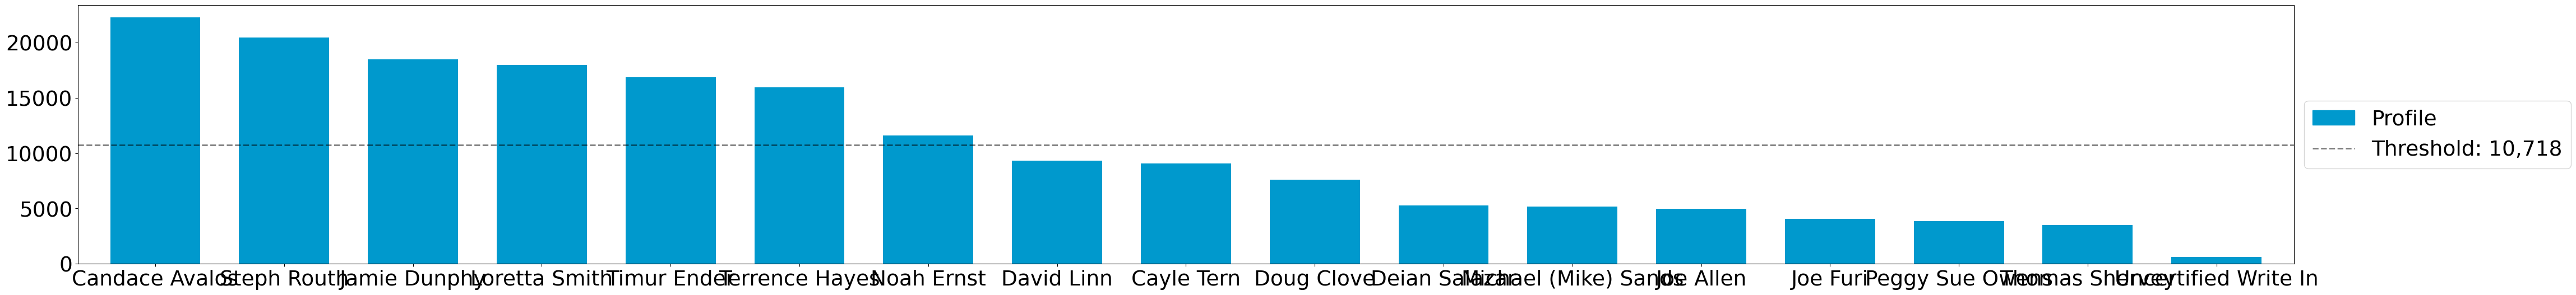

In [7]:
# Task 1: Edit the axis names
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

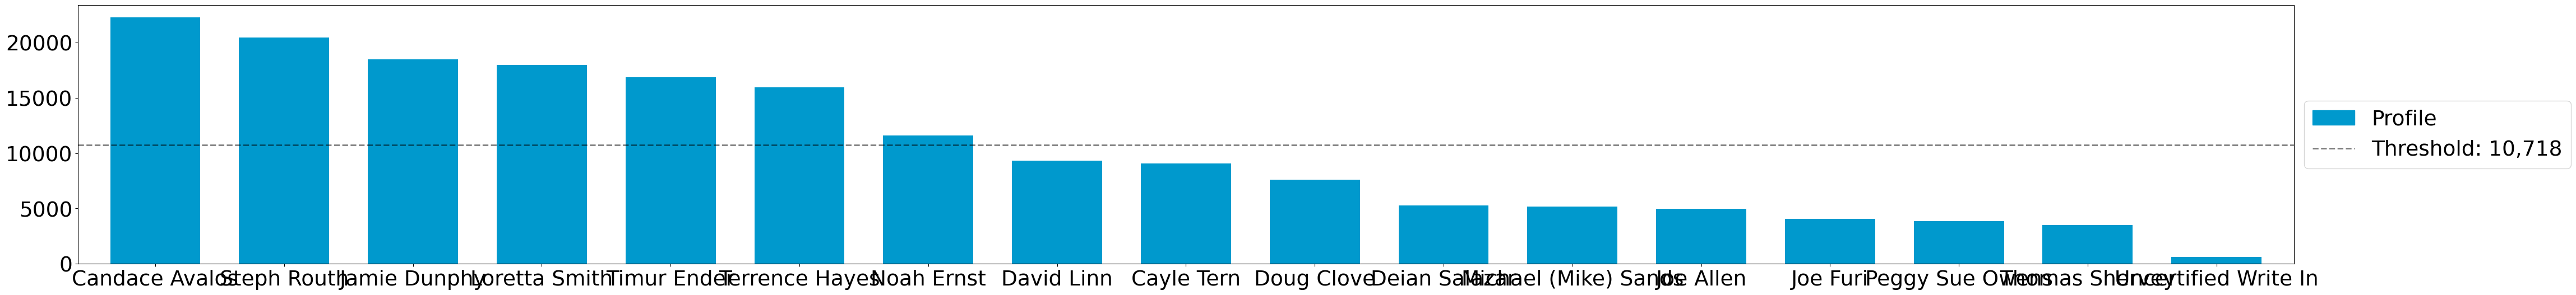

In [8]:
#Task 2: Normalize the data
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

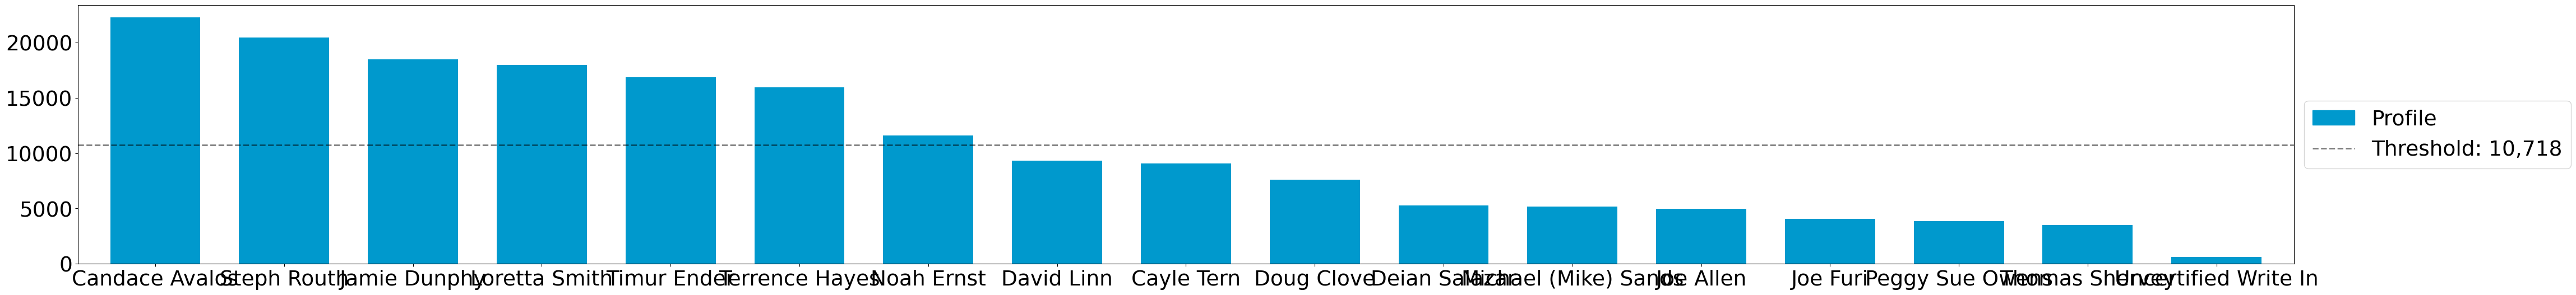

In [9]:
# Task 3: Change the color of the bars
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

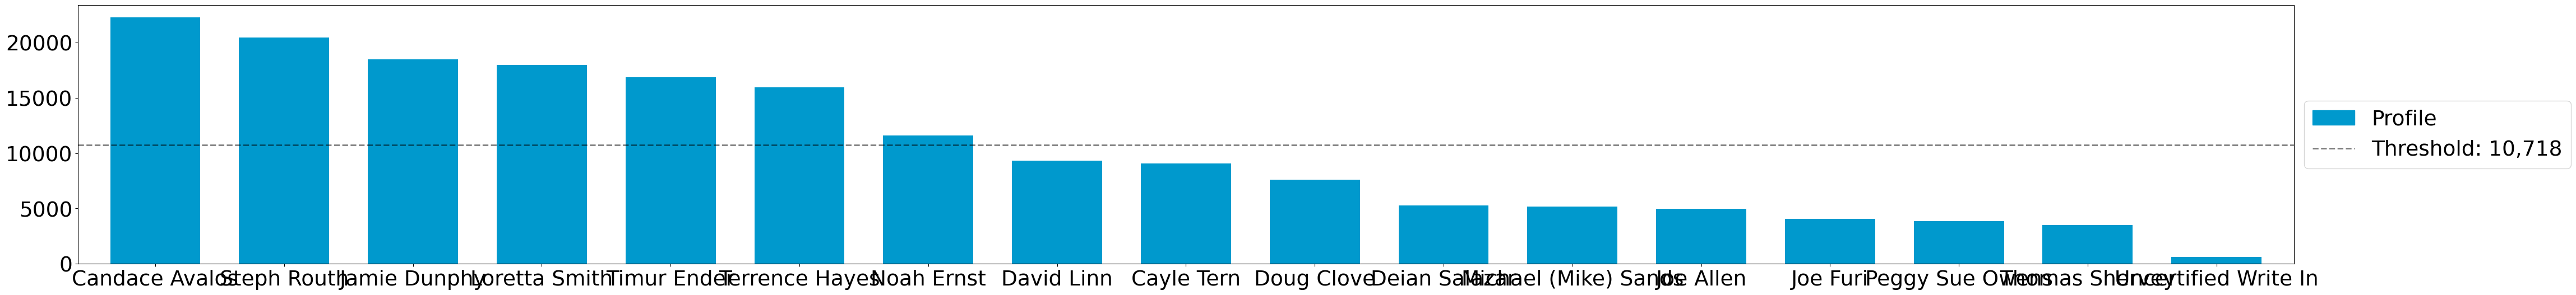

In [10]:
# Task 4: Change the width of the bars
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

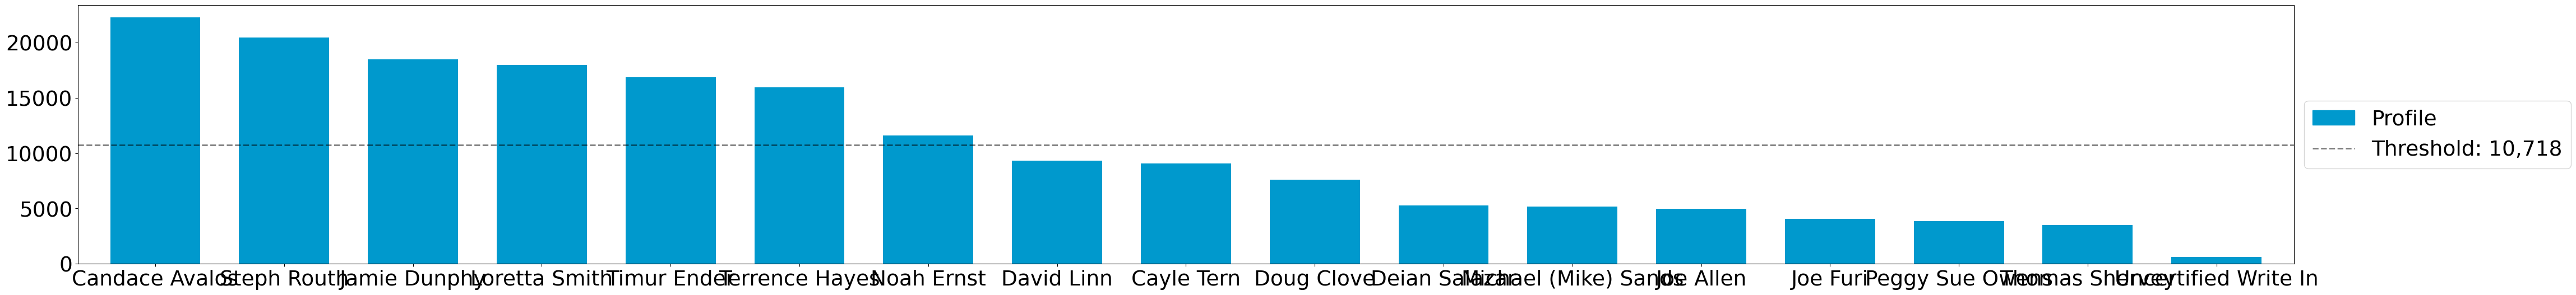

In [11]:
# Task 5: Change the order of the bars
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

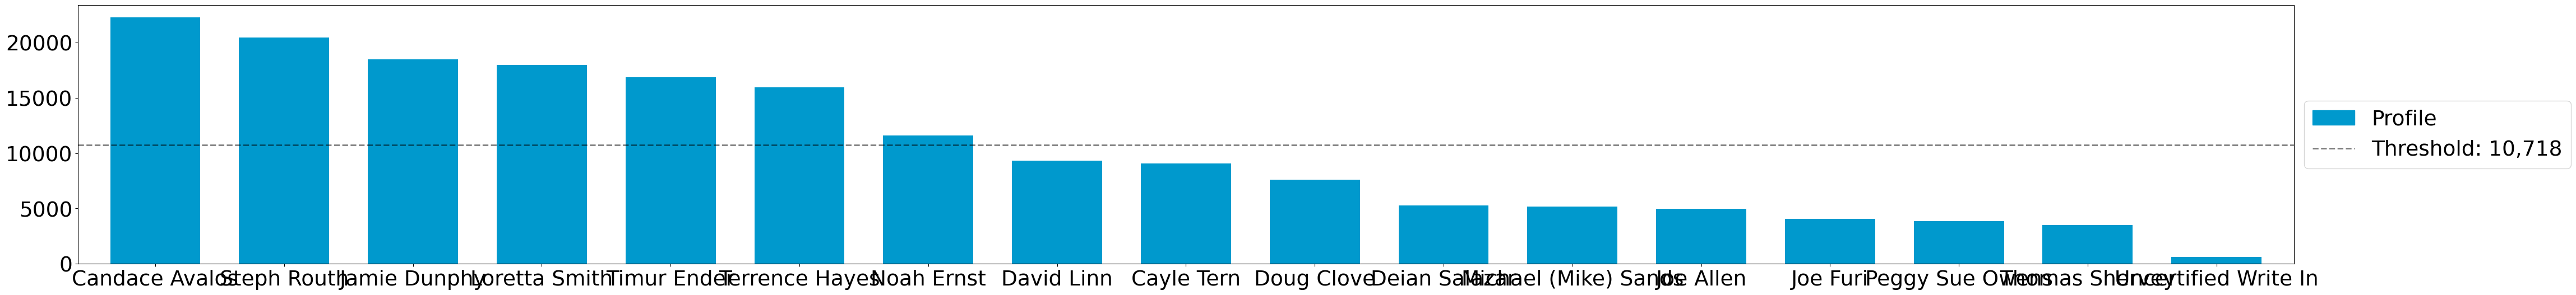

In [12]:
# Task 6: Relabel the candidates with integer labels
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

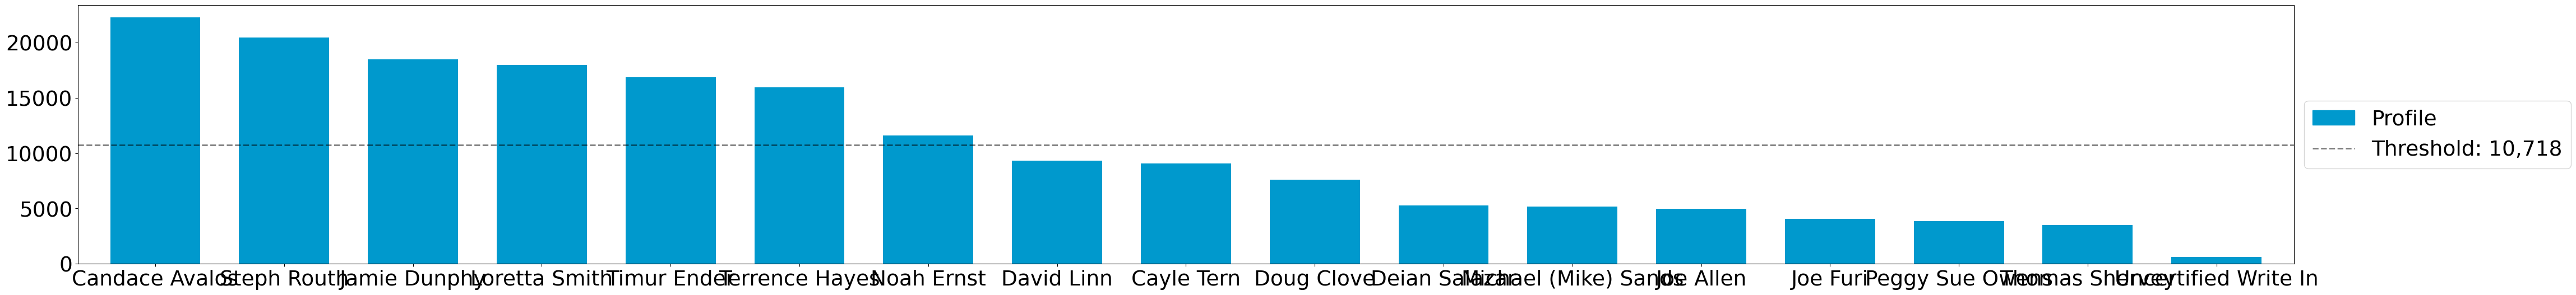

In [13]:
# Task 7: Change the legend font size
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

<Axes: >

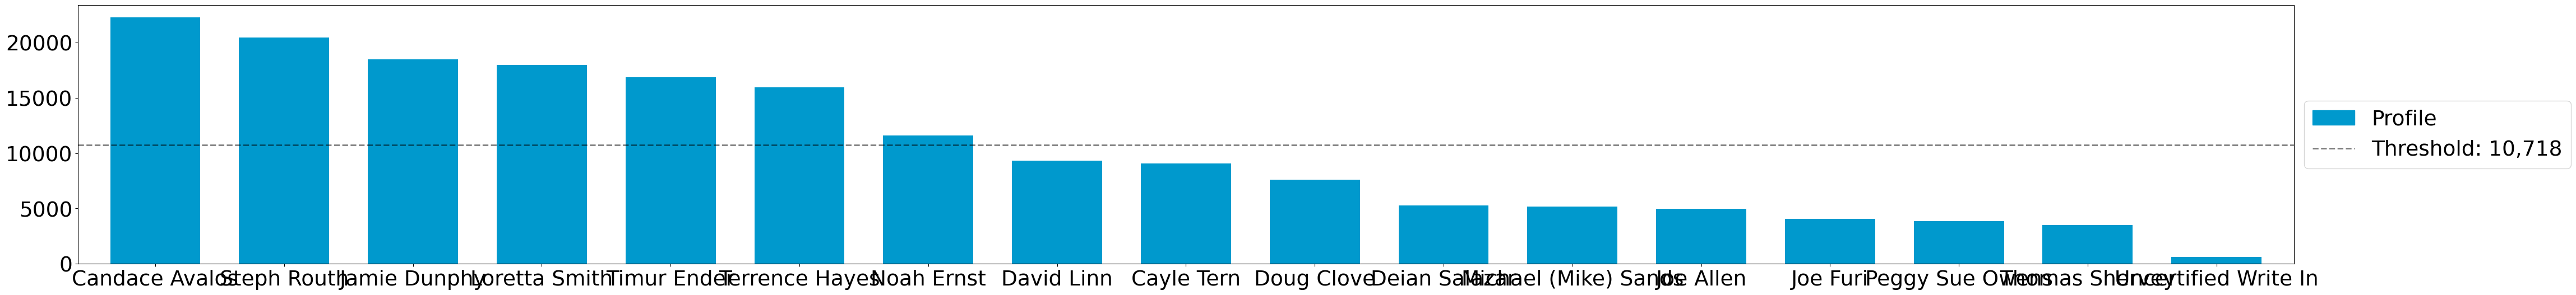

In [14]:
# Task 8: Play around wit the legend location
profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

# Some quick info on Matplotlib

Below is a very small bit of code that shows the standard way that we plot a figure using
matplotlib.

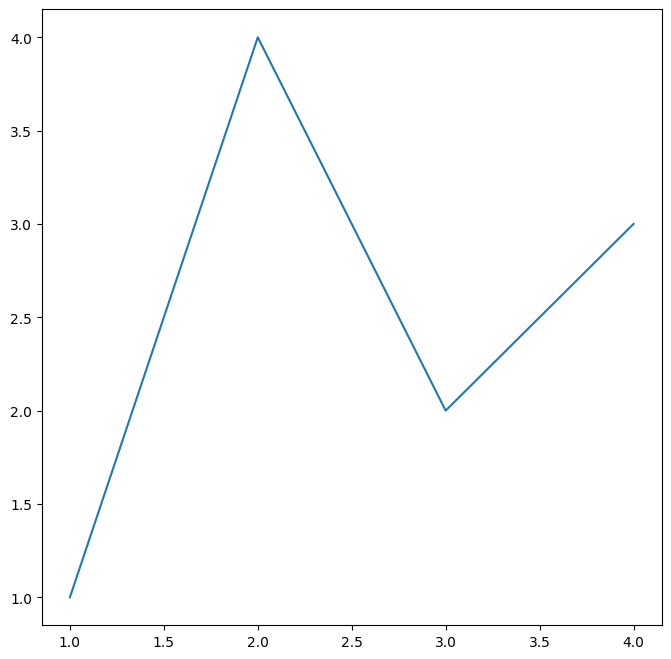

In [15]:
fig, ax = plt.subplots(figsize = (8,8))             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

We will be interested in editing the Axes object `ax` next to make our plots look nicer.
Here is an image that tells you many of the things that you can change in the axes object:

<img src="https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/parts_of_a_figure.webp"
     alt="parts of a figure"
     width="40%"/>


### Try it yourself!

<Axes: >

/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/matplotlib/patches.py:796: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/matplotlib/patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


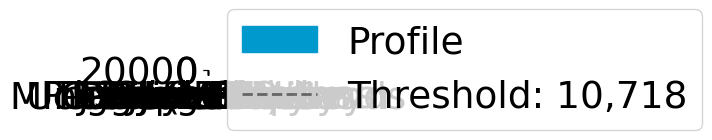

In [16]:
# Task 1: Use `fig, ax = plt.subplots(figsize=(<pick a size>))` to create a figure and axes object. make sure to play around with different figure sizes to see how they affect the plot.

fig_size = (0,0) # Edit this line
fig, ax = plt.subplots(figsize=fig_size)

profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True,
    ax = ax # pass the axes object to the function
)

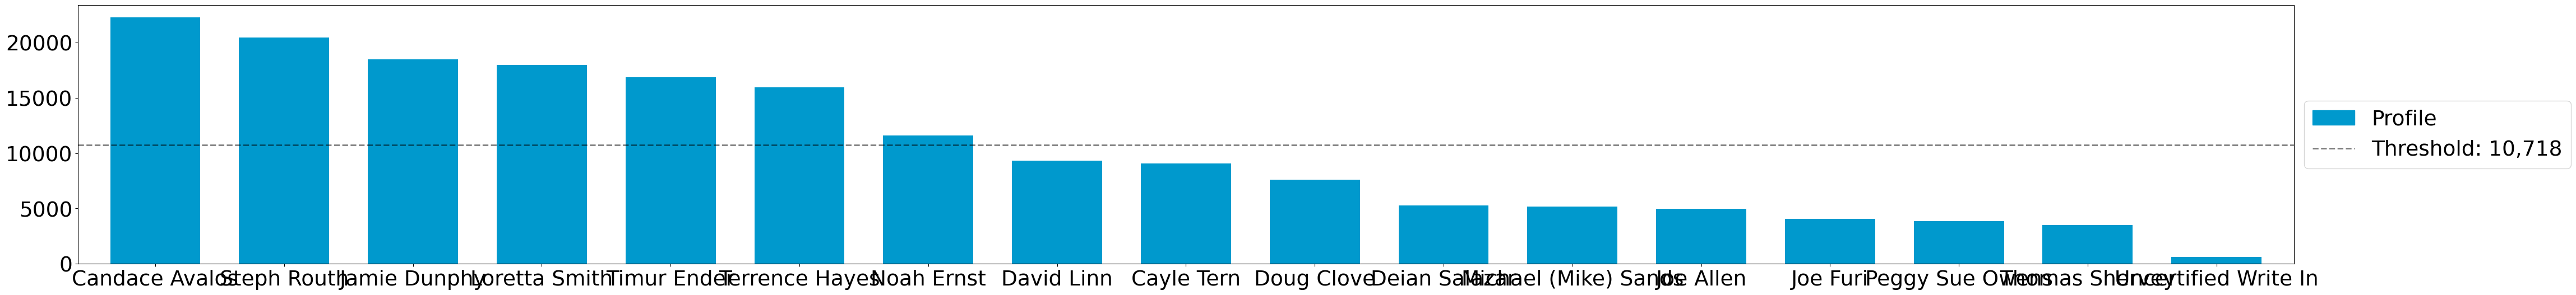

In [17]:
# Task 2: Use `ax.spines[<side>].set_visible(False)` to hide some of the spines of the plot.

ax = profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True,
)

# Uncomment the line below and select a side to hide
# ax.spines["SELECT A SIDE HERE"].set_visible(False) 

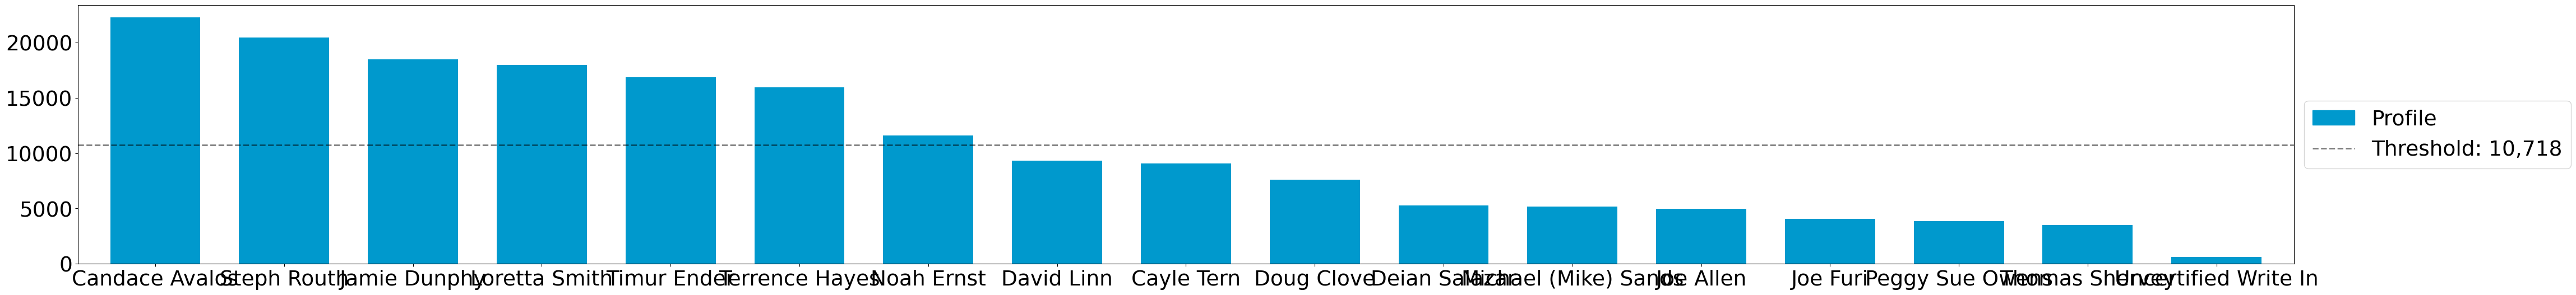

In [18]:
# Task 3: Use `ax.yticks(rotation=<pick a rotation>)` to rotate the y-axis ticks and make them easier to read.

ax = profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True,
)

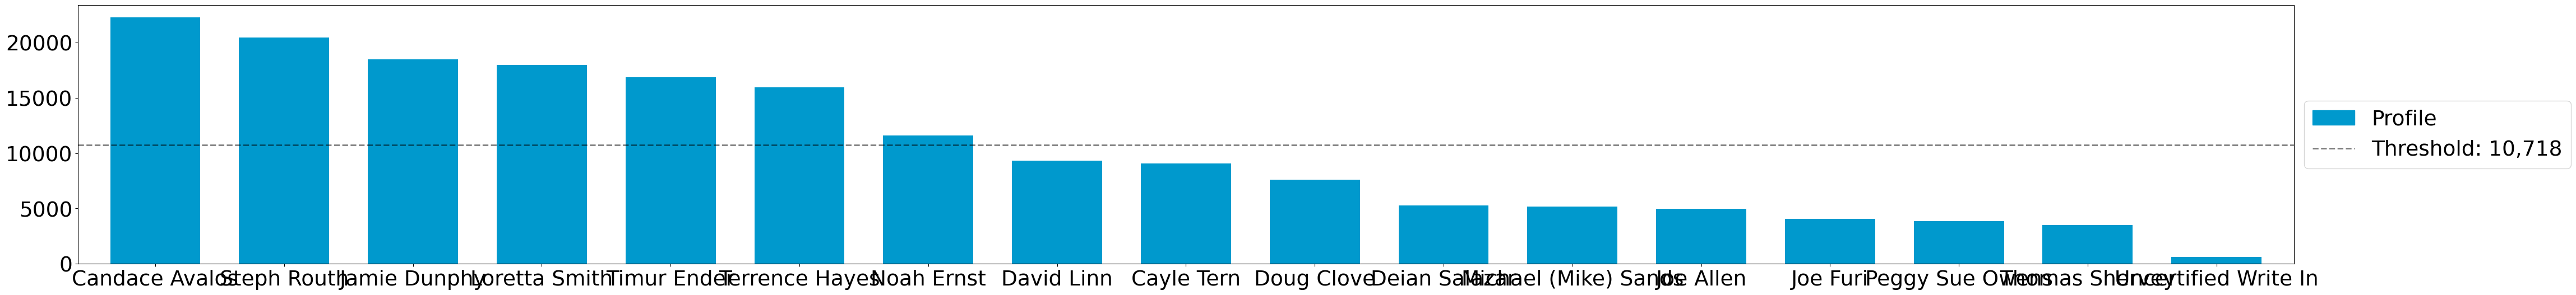

In [19]:
# Task 4: Use `ax.set_yscale(<scale>)` to change the scale of the y-axis. Docs -> https://matplotlib.org/stable/users/explain/quick_start.html#scales

ax = profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True,
)

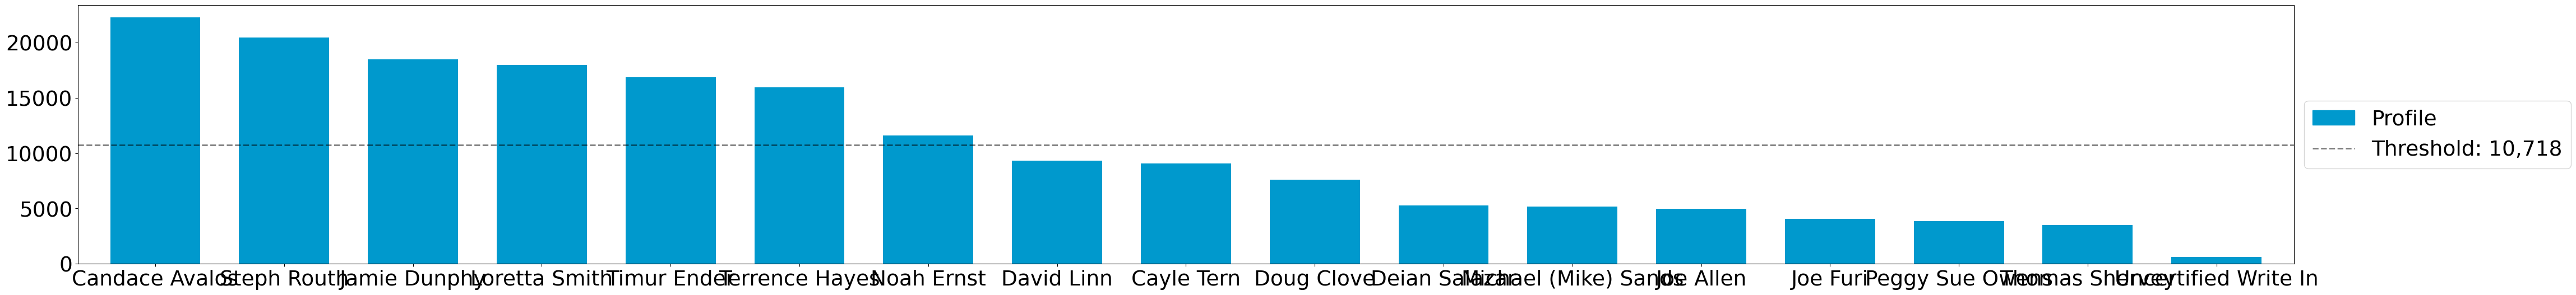

In [20]:
# Task 5: Use `fig, ax = plt.subplots(figsize=(<pick a size>), nrows=2)` and plot two different histograms on the same figure. Docs ->  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

ax = profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True,
)

### Filtering to viable candidates

In [21]:
mentions_dict = mentions(profile)
viable_cands = [c for c, mentions in mentions_dict.items() if mentions >= election.threshold]

viable_cands = sorted(viable_cands, reverse=True, key = lambda x: mentions_dict[x])
print("Viable candidates in decreasing order of mentions")

for i, cand in enumerate(viable_cands):
    print(i+1, cand)

Viable candidates in decreasing order of mentions
1 Candace Avalos
2 Steph Routh
3 Jamie Dunphy
4 Loretta Smith
5 Timur Ender
6 Terrence Hayes
7 Noah Ernst


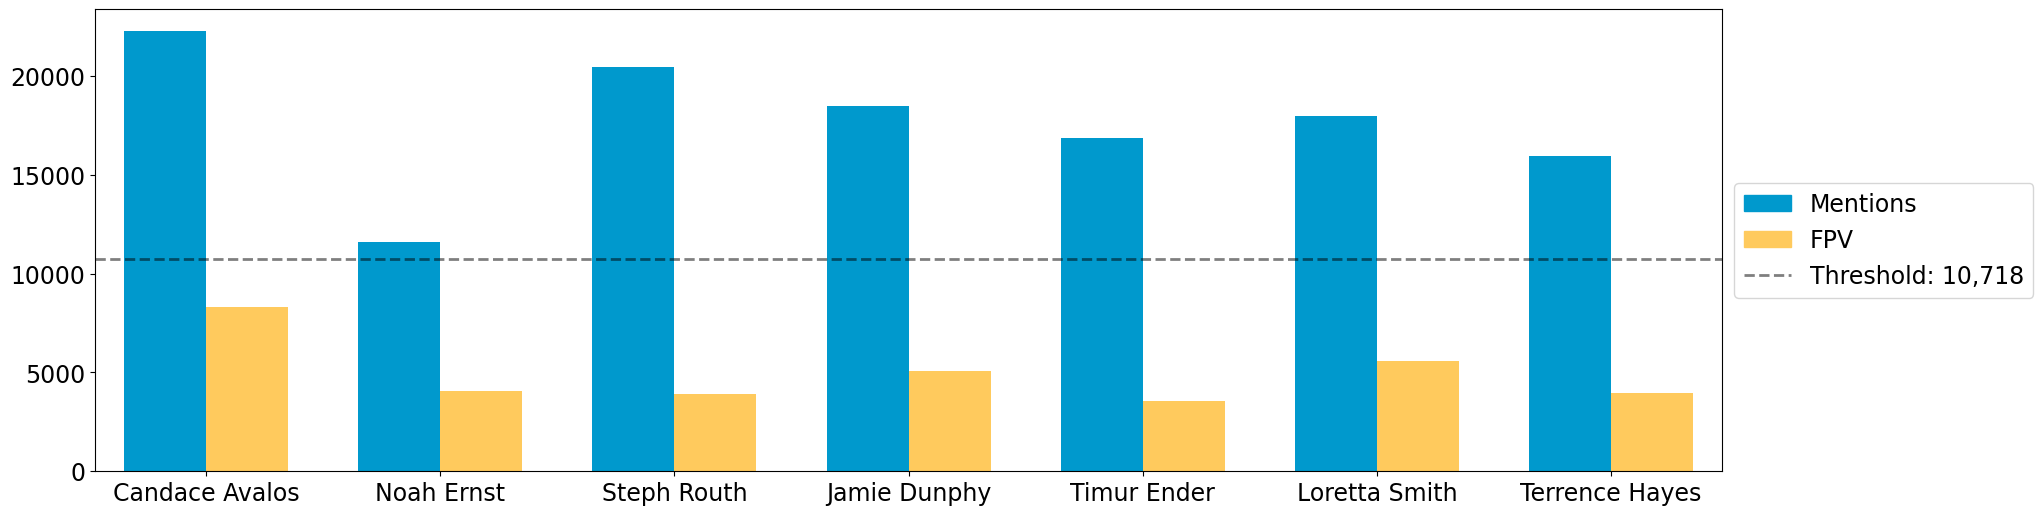

In [22]:
viable_cands_mentions = {cand:mentions for cand, mentions in mentions_dict.items() if cand in viable_cands}
viable_cands_fpv = {cand: fpv for cand, fpv in first_place_votes(profile).items() if cand in viable_cands}

ax = multi_bar_plot(
    data={"Mentions": viable_cands_mentions, "FPV": viable_cands_fpv},  
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
)

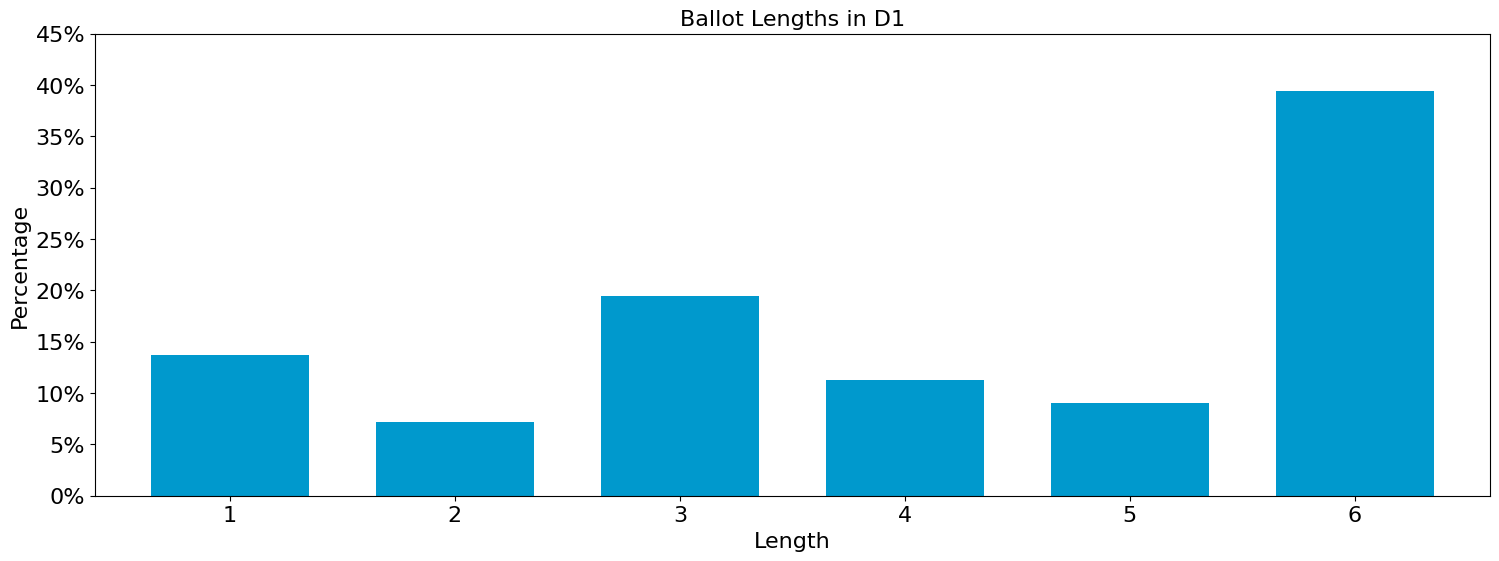

In [23]:
ax = profile_ballot_lengths_plot(profile, title="Ballot Lengths in D1", normalize=True, y_axis_name="Percentage", x_axis_name="Length")

# change the tick labels to percentages
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f"{float(x.get_text()):.0%}" for x in ax.get_yticklabels()])

plt.show()

## Bubble Plots

These plots are relatively new, and have not quite made it into VoteKit at this point, but
we are providing the code for you to use as a reference.

In [ ]:
# from votekit.elections import STV
# from votekit.ballot_generator import slate_PlackettLuce
# from tqdm.notebook import tqdm

# num_cands = {"P": 5, "C": 6}
# num_voters = 2500
# num_seats = 5
# num_trials = 100

# # Fixed parameters
# slate_to_candidates = {"P": [f"P_{i}" for i in range(num_cands["P"])], # creates the list ["P_0", "P_1", "P_2"]
#                         "C": [f"C_{i}" for i in range(num_cands["C"])],} # creates the list ["C_0", "C_1", "C_2"]

# cohesion_parameters = {
#     "P": {"P":.7, "C":.3}, 
#     "C": {"P":.4, "C":.6}, 
#     }

# alphas = {
#     "P": {"P":0.1, "C":0.1},
#     "C": {"P":0.1, "C":0.1},
#     }

# # Varying parameter
# turnouts = {
#     "high_progressive_turnout"  : {"P": .7, "C": .3},
#     "low_progressive_turnout"  : {"P": .5, "C": .5},
#     }


# # used to store the results
# num_prog_winners_by_turnout = {
#     "high_progressive_turnout": [],
#     "low_progressive_turnout": [],
#     }

# for turnout_label, bloc_voter_prop in turnouts.items():

#     print(turnout_label)

#     for _ in tqdm(range(num_trials)): # tqdm creates a progress bar 
#         pl = slate_PlackettLuce.from_params(slate_to_candidates=slate_to_candidates,
#                 bloc_voter_prop=bloc_voter_prop,
#                 cohesion_parameters=cohesion_parameters,
#                 alphas=alphas)
        
#         profile = pl.generate_profile(num_voters)

#         e = STV(profile, m= num_seats)

#         winners = e.get_elected()

#         # compute the number of profressive winners
#         num_prog_winners = len([c for cand_set in winners for c in cand_set if "P_" in c])

#         # add the number of progressive winners to the end of a list 
#         num_prog_winners_by_turnout[turnout_label].append(num_prog_winners)

high_progressive_turnout


  0%|          | 0/100 [00:00<?, ?it/s]

Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak


/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/votekit/pref_profile/pref_profile.py:1100: UserWarning: Profile does not contain rankings but max_ranking_length=11. Setting max_ranking_length to 0.
  warnings.warn(


Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
low_progressive_turnout


  0%|          | 0/100 [00:00<?, ?it/s]

Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak


/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/votekit/pref_profile/pref_profile.py:1100: UserWarning: Profile does not contain rankings but max_ranking_length=11. Setting max_ranking_length to 0.
  warnings.warn(


Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak


/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/votekit/pref_profile/pref_profile.py:1100: UserWarning: Profile does not contain rankings but max_ranking_length=11. Setting max_ranking_length to 0.
  warnings.warn(


Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak
Initial tiebreak was unsuccessful, performing random tiebreak


/mnt/efs/h/Dropbox/MADLAB/Training_Materials/June_25/.venv/lib/python3.13/site-packages/votekit/pref_profile/pref_profile.py:1100: UserWarning: Profile does not contain rankings but max_ranking_length=11. Setting max_ranking_length to 0.
  warnings.warn(


Initial tiebreak was unsuccessful, performing random tiebreak


In [ ]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/num_prog_winners_by_turnout.pkl') as response:
    num_prog_winners_by_turnout = pickle.load(response)

In [20]:
from typing import Optional
import numpy as np
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

def bubble_plot_integer(
    data: list[list[int]], 
    colors: list[str], 
    ax: Optional[Axes] = None, 
    marker: str =".", 
    size: int = 1000
): 
    # create figure

    if ax is None:
        fig, ax = plt.subplots()
    
    x_max = int(max(max(vector) for vector in data))
    bin_min = 0
    bin_max = x_max
    bins = np.arange(bin_min-.5, bin_max+1.5, 1)
    
    for j, vector in enumerate(data):
        x = [i for i in range(x_max+1)] # x=0,...,x_max
        y = [j+1]*len(x) # put each vector at a different height
        
        bin_heights, _ = np.histogram(vector, bins = bins,density=True)
        circle_areas = [size*bin_heights[i] for i in range(x_max+1)]
        ax.scatter(x, y, s=circle_areas, alpha=1, color = colors[j], label = None, edgecolors='black', marker=marker)

    return ax

In [21]:
num_prog_winners_by_turnout.keys()

dict_keys(['high_progressive_turnout', 'low_progressive_turnout'])

In [29]:
import pickle
with open('num_prog_winners_by_turnout.pkl', 'wb') as f:
    pickle.dump(num_prog_winners_by_turnout, f)

<Axes: >

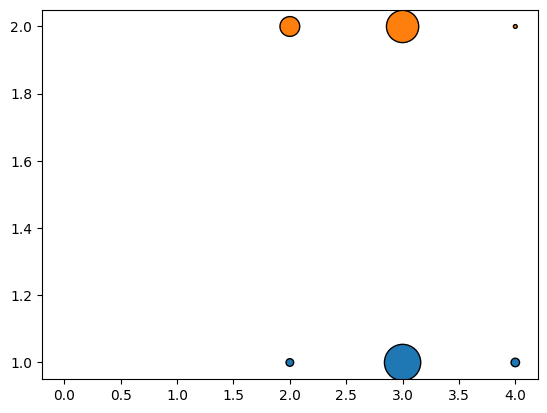

In [28]:
bubble_plot_integer(
    data = [num_prog_winners_by_turnout["high_progressive_turnout"], num_prog_winners_by_turnout["low_progressive_turnout"]],
    colors = ["#1f77b4", "#ff7f0e"],
    size=3000
)

# Pairwise Comparison Graph

In [ ]:
pwcg = PairwiseComparisonGraph(profile)
dominating_tiers = pwcg.get_dominating_tiers()

print("The dominating tiers are: ")
for tier in dominating_tiers:
    print(tier)

if pwcg.has_condorcet_winner():
    print(f"\nThe Condorcet candidate is: {next(iter(dominating_tiers[0]))}")
else:
    print(f"\n There is no unique Condorcet winner. The top tier is {dominating_tiers[0]}")

The dominating tiers are: 
{'Candace Avalos'}
{'Steph Routh'}
{'Jamie Dunphy'}
{'Loretta Smith'}
{'Timur Ender'}
{'Terrence Hayes'}
{'Noah Ernst'}
{'Cayle Tern'}
{'David Linn'}
{'Doug Clove'}
{'Michael (Mike) Sands'}
{'Deian Salazar'}
{'Joe Allen'}
{'Joe Furi'}
{'Peggy Sue Owens'}
{'Thomas Shervey'}
{'Uncertified Write In'}

The Condorcet candidate is: Candace Avalos


<Axes: >

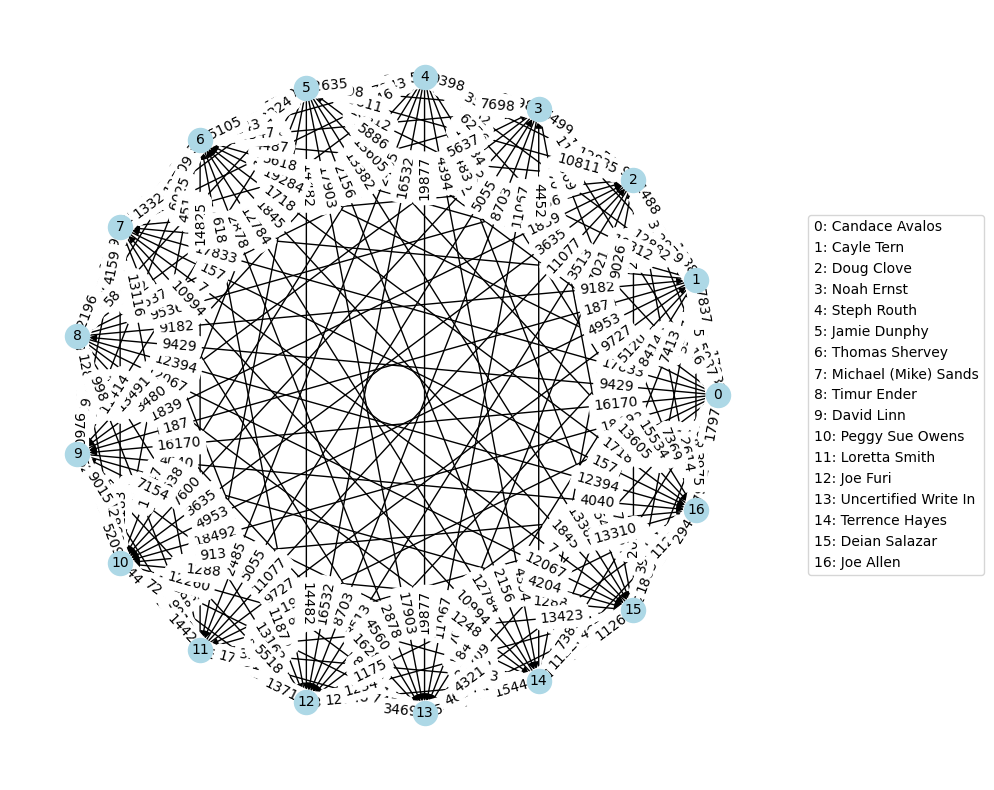

In [ ]:
pwcg.draw()

<Axes: >

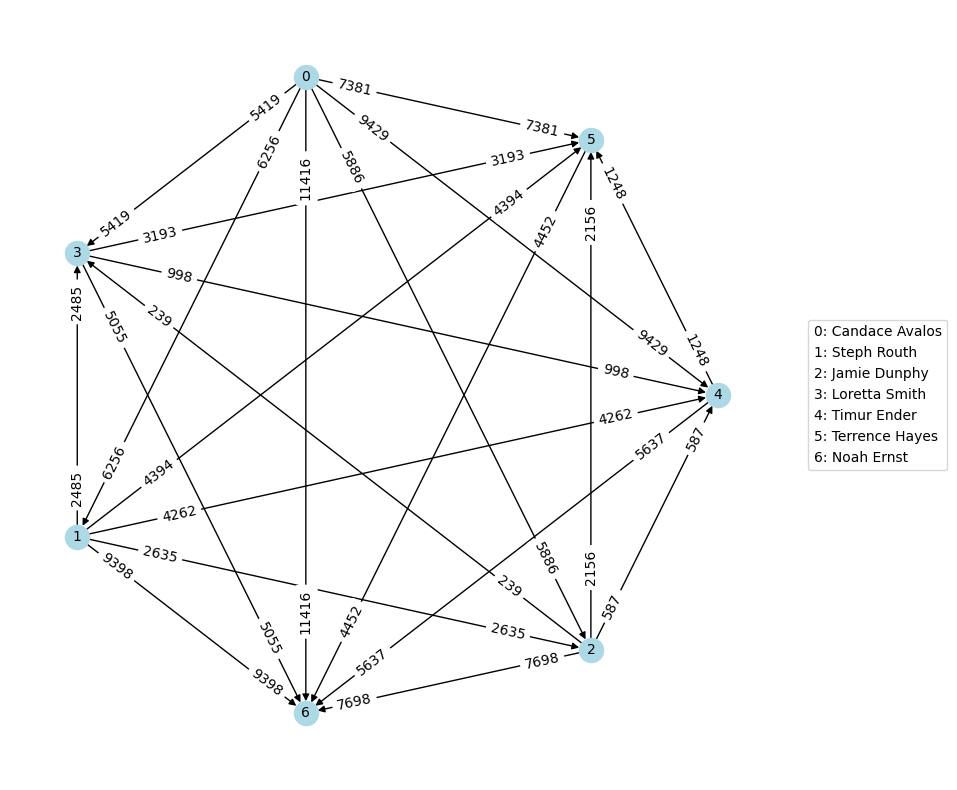

In [ ]:
pwcg.draw(candidate_list = viable_cands) 

## Candidate Similarity

VoteKit also has some plotting functions to help users understand the relationship between
candidates and their support in ranked elections. Currently we provide plotting functions for
three different types of matrix: 
- boost
- candidate distance
- comentions

### Boost Matrix

The (i,j) entry of the boost matrix shows P(mention i | mention j) - P(mention i). Thus,
the i,j entry shows the boost given to candidate i by candidate j.

In [ ]:
all_cands_sorted_by_mentions = sorted(profile.candidates, reverse=True, key = lambda x: mentions_dict[x])

# computes the matrix
boost_matrix  = boost_matrix(profile, candidates = all_cands_sorted_by_mentions)

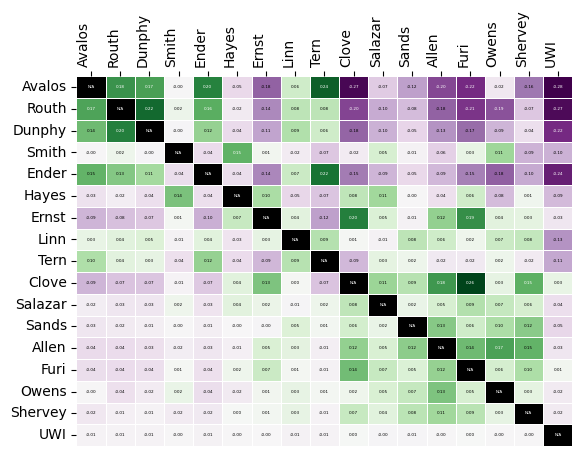

In [ ]:
all_last_names = [name.split(" ")[-1] if "Write In" not in name else "UWI" for name in all_cands_sorted_by_mentions]

# plots the matrix
ax  = matrix_heatmap(
    boost_matrix, 
    row_labels=all_last_names, 
    column_labels=all_last_names,
    row_label_rotation = 0,
    column_label_rotation = 90
)

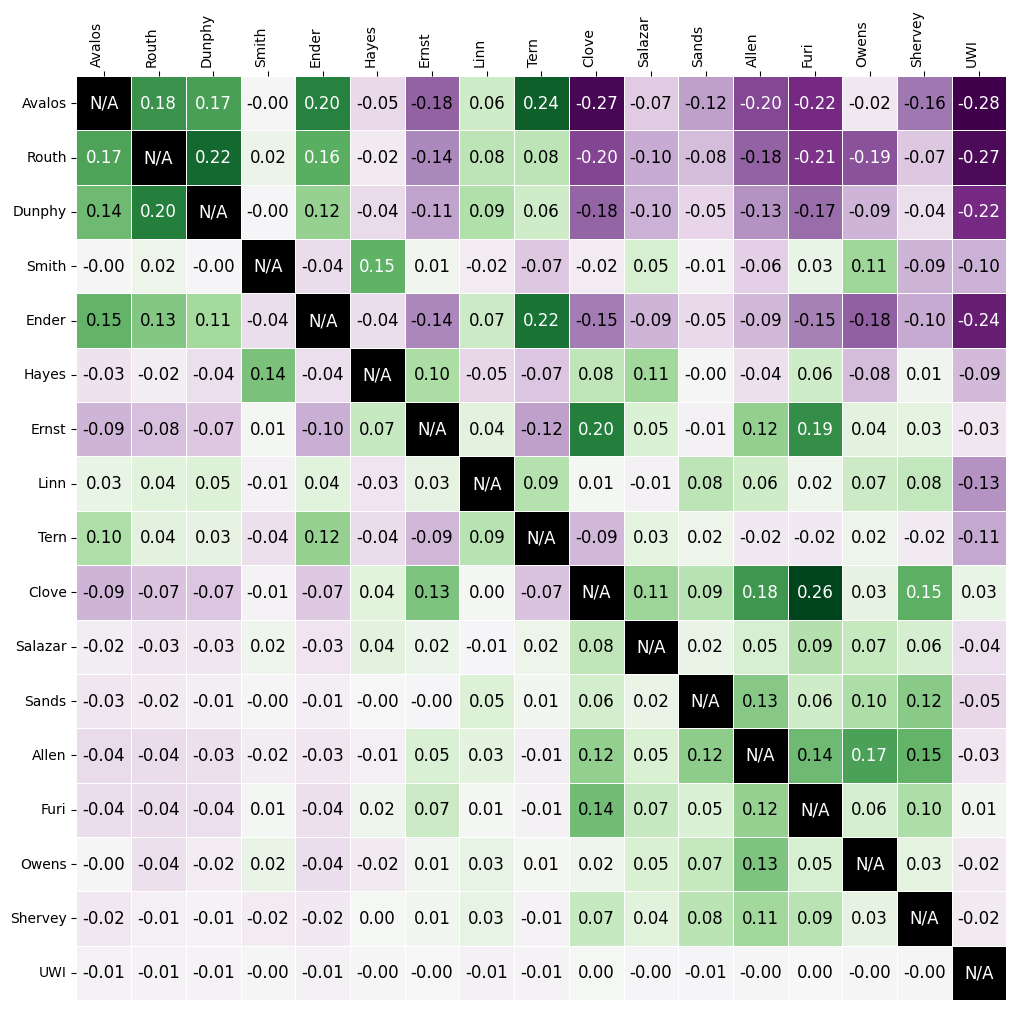

In [ ]:
# Adjus the figure and font size
fig, ax = plt.subplots(figsize=(12,12))

ax  = matrix_heatmap(
    boost_matrix, 
    row_labels=all_last_names, 
    column_labels=all_last_names,
    row_label_rotation = 0,
    column_label_rotation = 90,
    ax = ax,
    cell_font_size = 12
)

### Candidate Distance Matrix

The (i,j) entry of the candidate distance matrix shows the average distance between
candidates i and j when i >= j on the same ballot.

In [ ]:
cand_dist_matrix  = candidate_distance_matrix(profile, candidates = viable_cands)

last_names_viable = [name.split(" ")[-1] for name in viable_cands]

ax  = matrix_heatmap(
    cand_dist_matrix, 
    row_labels=last_names_viable, 
    column_labels=last_names_viable,
    row_label_rotation = 0,
    column_label_rotation = 90,
)

NameError: name 'viable_cands' is not defined

### Comentions Matrix

The (i,j) entry of the comentions matrix shows the number of times candidates i,j were mentioned on the same ballot with i >= j. There is an option to symmetrize the matrix, which makes the (i,j) entry the number of times that i and j were mentioned on the same ballot (irrespective of position).

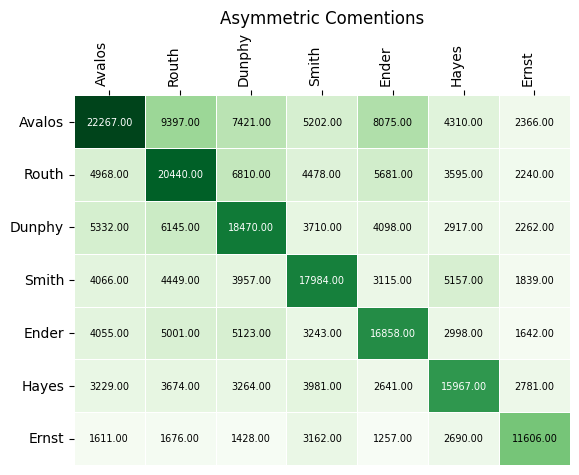

In [ ]:
comentions_mat_asym  = comentions_matrix(profile, candidates = viable_cands)
ax  = matrix_heatmap(
    comentions_mat_asym, 
    row_labels=last_names_viable, 
    column_labels=last_names_viable,
    row_label_rotation = 0,
    column_label_rotation = 90,
    n_decimals_to_display=0
)

plt.title("Asymmetric Comentions") 
plt.show()

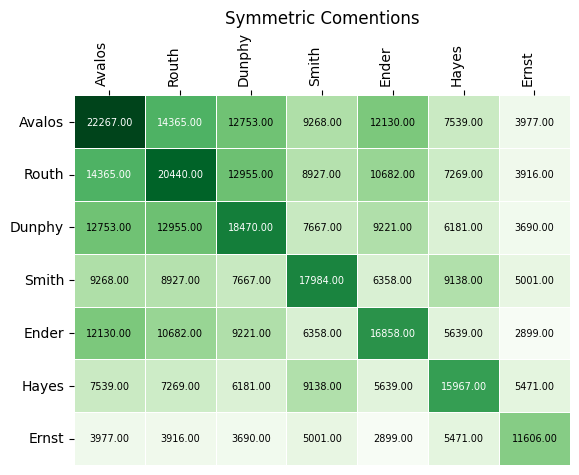

In [ ]:
comentions_mat_sym  = comentions_matrix(profile, candidates = viable_cands, symmetric=True)
ax  = matrix_heatmap(
    comentions_mat_sym, 
    row_labels=last_names_viable, 
    column_labels=last_names_viable,
    row_label_rotation = 0,
    column_label_rotation = 90,
    n_decimals_to_display=0
)

plt.title("Symmetric Comentions") 
plt.show()

### Try it yourself!

Play around with all of the parameters for the `matrix_heatmap` function to see what you can do!
You might find the following list of colormaps interesting:

[https://matplotlib.org/stable/users/explain/colors/colormaps.html](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

- `matrix` (np.ndarray): A 2D numpy array containing the data to be plotted.
- `ax` (matplotlib.axes.Axes, optional): The matplotlib axis to plot on. Defaults to None,
    in which case an axis is created.
- `show_cell_values` (bool): Whether to show the values of the cells in the heatmap. These
    values are shown in the center of each cell and are dynamically formatted to be
    human-readable.  Defaults to True.
- `n_decimals_to_display` (int): The number of decimal places to display for the values
    in the heatmap.  Defaults to 2.
- `row_labels` (Optional(List[str])): A list of strings containing the labels for the rows
    of the heatmap. Defaults to None.
- `row_label_rotation` (Optional(float)): The rotation to apply to the row labels.
    Defaults to None.
- `row_legend` (Optional(Dict[str, str])): A dictionary mapping row labels to legend
    descriptions. Defaults to None.
- `column_labels` (Optional(List[str])): A list of strings containing the labels for the
    columns of the heatmap. Defaults to None.
- `column_label_rotation` (Optional(float)): The rotation to apply to the column labels.
    Defaults to None.
- `column_legend` (Optional(Dict[str, str])): A dictionary mapping column labels to legend
    descriptions. Defaults to None.
- `cell_color_map` (Optional(Union[str, matplotlib.colors.Colormap])): The color map to use
    for the heatmap. Defaults to `PRGn` if the matrix contains negative values and
    `Greens` otherwise.
- `cell_font_size` (Optional(int)): The font size to use for the cell values. Defaults to
    None, which will then use dynamic font size based on the number of cells and the
    figure size.
- `cell_spacing` (float): The spacing between the cells in the heatmap. Defaults to 0.5.
- `cell_divider_color` (str): The color to use for the cell dividers for spacing cells.
    Defaults to "white".
- `show_colorbar` (bool): Whether to show the colorbar for the heatmap. Defaults to False.
- `legend_font_size` (float): The font size to use for the legend. Defaults to 10.0.
- `legend_location` (str): The location to place the legend. Defaults to "center left".
- `legend_bbox_to_anchor` (Tuple[float, float]): The bounding box to anchor the legend to.
    Defaults to (1.03, 0.5).

## Choropleths

A _choropleth_ is basically a heatmap used commonly with geographic data. The only difference
from a true heatmap is that the color of each piece of geometry in the map corresponds to a
general aggregate statistic. This can be really useful for visualizing things like population
density.

In [ ]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/nc_viz_data.parquet') as response:
    data = response.read()
    buf = BytesIO(data)

# now GeoPandas/pyarrow can read it
gdf = gpd.read_parquet(buf)
gdf

path  white_pop_20  other_pop_20  amin_pop_20  \
0     vtd:37025008-00        4802.0          33.0        111.0   
1     vtd:37081000G16        1539.0           9.0         22.0   
2     vtd:3719500PRTO        2791.0          16.0         79.0   
3     vtd:37025001-10        2862.0          53.0         73.0   
4     vtd:37025001-07        2551.0          30.0         61.0   
...               ...           ...           ...          ...   
2661  vtd:37185000007         347.0           1.0         28.0   
2662  vtd:37185000002         821.0           6.0         21.0   
2663  vtd:37185000004         389.0           1.0         18.0   
2664  vtd:370630053-1        2601.0          69.0         27.0   
2665  vtd:370630035.3        6644.0         184.0        109.0   

      asian_nhpi_pop_20  hpop_20  bpop_20  total_pop_20  white_vap_20  \
0                  27.0    126.0    219.0        5318.0        3888.0   
1                  18.0     36.0     61.0        1685.0        1219.0   
2                  40.0    407.0   1929.0        5262.0        2328.0   
3                 199.0    269.0    643.0        4099.0        2268.0   
4                 550.0    183.0    511.0        3886.0        2007.0   
...                 ...      ...      ...           ...           ...   
2661               12.0     91.0    676.0        1155.0         303.0   
2662                8.0     23.0    270.0        1149.0         737.0   
2663                8.0     33.0    647.0        1096.0         320.0   
2664              459.0    280.0   1020.0        4456.0        2130.0   
2665             1365.0    940.0   3030.0       12272.0        5339.0   

      other_vap_20  ...  sen_22_dem  sen_20_rep  sen_20_dem  sen_16_rep  \
0             19.0  ...       472.0      2502.0       684.0      2091.0   
1              7.0  ...       745.0       491.0       792.0       553.0   
2             11.0  ...       762.0      1478.0      1266.0      1359.0   
3             35.0  ...       723.0      1217.0      1025.0      1182.0   
4             20.0  ...       649.0      1440.0       824.0      1319.0   
...            ...  ...         ...         ...         ...         ...   
2661           0.0  ...       257.0       172.0       393.0       143.0   
2662           5.0  ...       216.0       409.0       288.0       351.0   
2663           1.0  ...       252.0       228.0       374.0       197.0   
2664          56.0  ...      1709.0       545.0      2160.0       606.0   
2665         129.0  ...      5228.0      1691.0      6327.0      1675.0   

      sen_16_dem  pres_20_rep  pres_20_dem  pres_16_rep  pres_16_dem  \
0          529.0       2636.0        698.0       2139.0        519.0   
1          668.0        449.0        851.0        477.0        697.0   
2         1201.0       1576.0       1255.0       1414.0       1178.0   
3          768.0       1266.0       1118.0       1189.0        802.0   
4          591.0       1463.0        880.0       1295.0        632.0   
...          ...          ...          ...          ...          ...   
2661       410.0        194.0        385.0        143.0        415.0   
2662       250.0        424.0        287.0        363.0        247.0   
2663       377.0        244.0        362.0        205.0        372.0   
2664      1838.0        490.0       2261.0        467.0       1904.0   
2665      5013.0       1550.0       6620.0       1324.0       5236.0   

                                               geometry  
0     POLYGON ((544178.584 3919272.215, 544180.919 3...  
1     POLYGON ((603756.925 3992696.691, 603763.571 3...  
2     POLYGON ((778343.935 3968574.59, 778344.546 39...  
3     POLYGON ((529192.348 3911013.541, 529324.208 3...  
4     POLYGON ((531840.803 3908214.534, 531940.197 3...  
...                                                 ...  
2661  POLYGON ((747324.767 4016190.367, 747387.655 4...  
2662  POLYGON ((759296.946 4036764.5, 759298.398 403...  
2663  POLYGON ((743988.193 4046929.686, 744002.568 4...  
2

<Axes: >

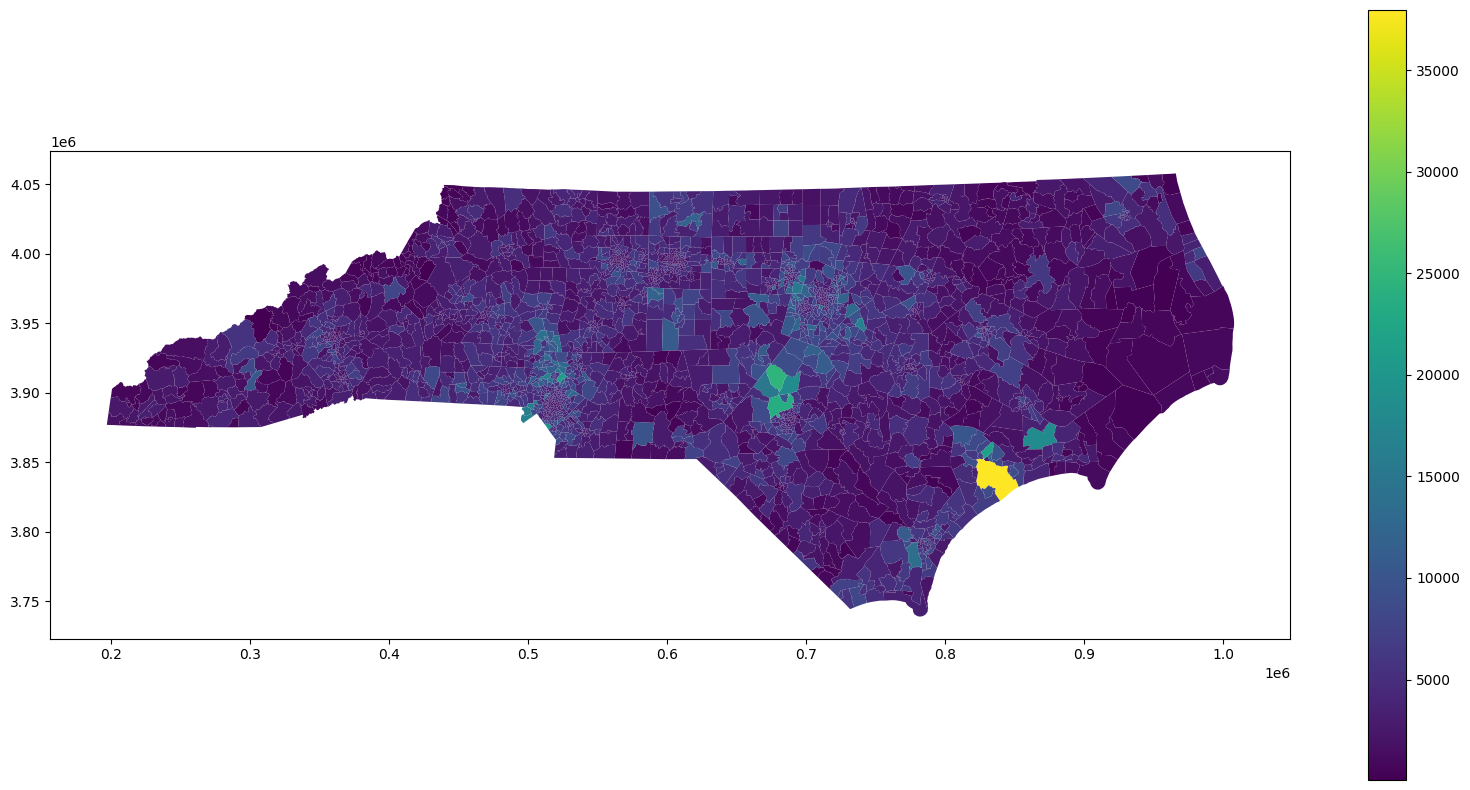

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
gdf.plot(ax=ax, column='total_pop_20', legend=True)   

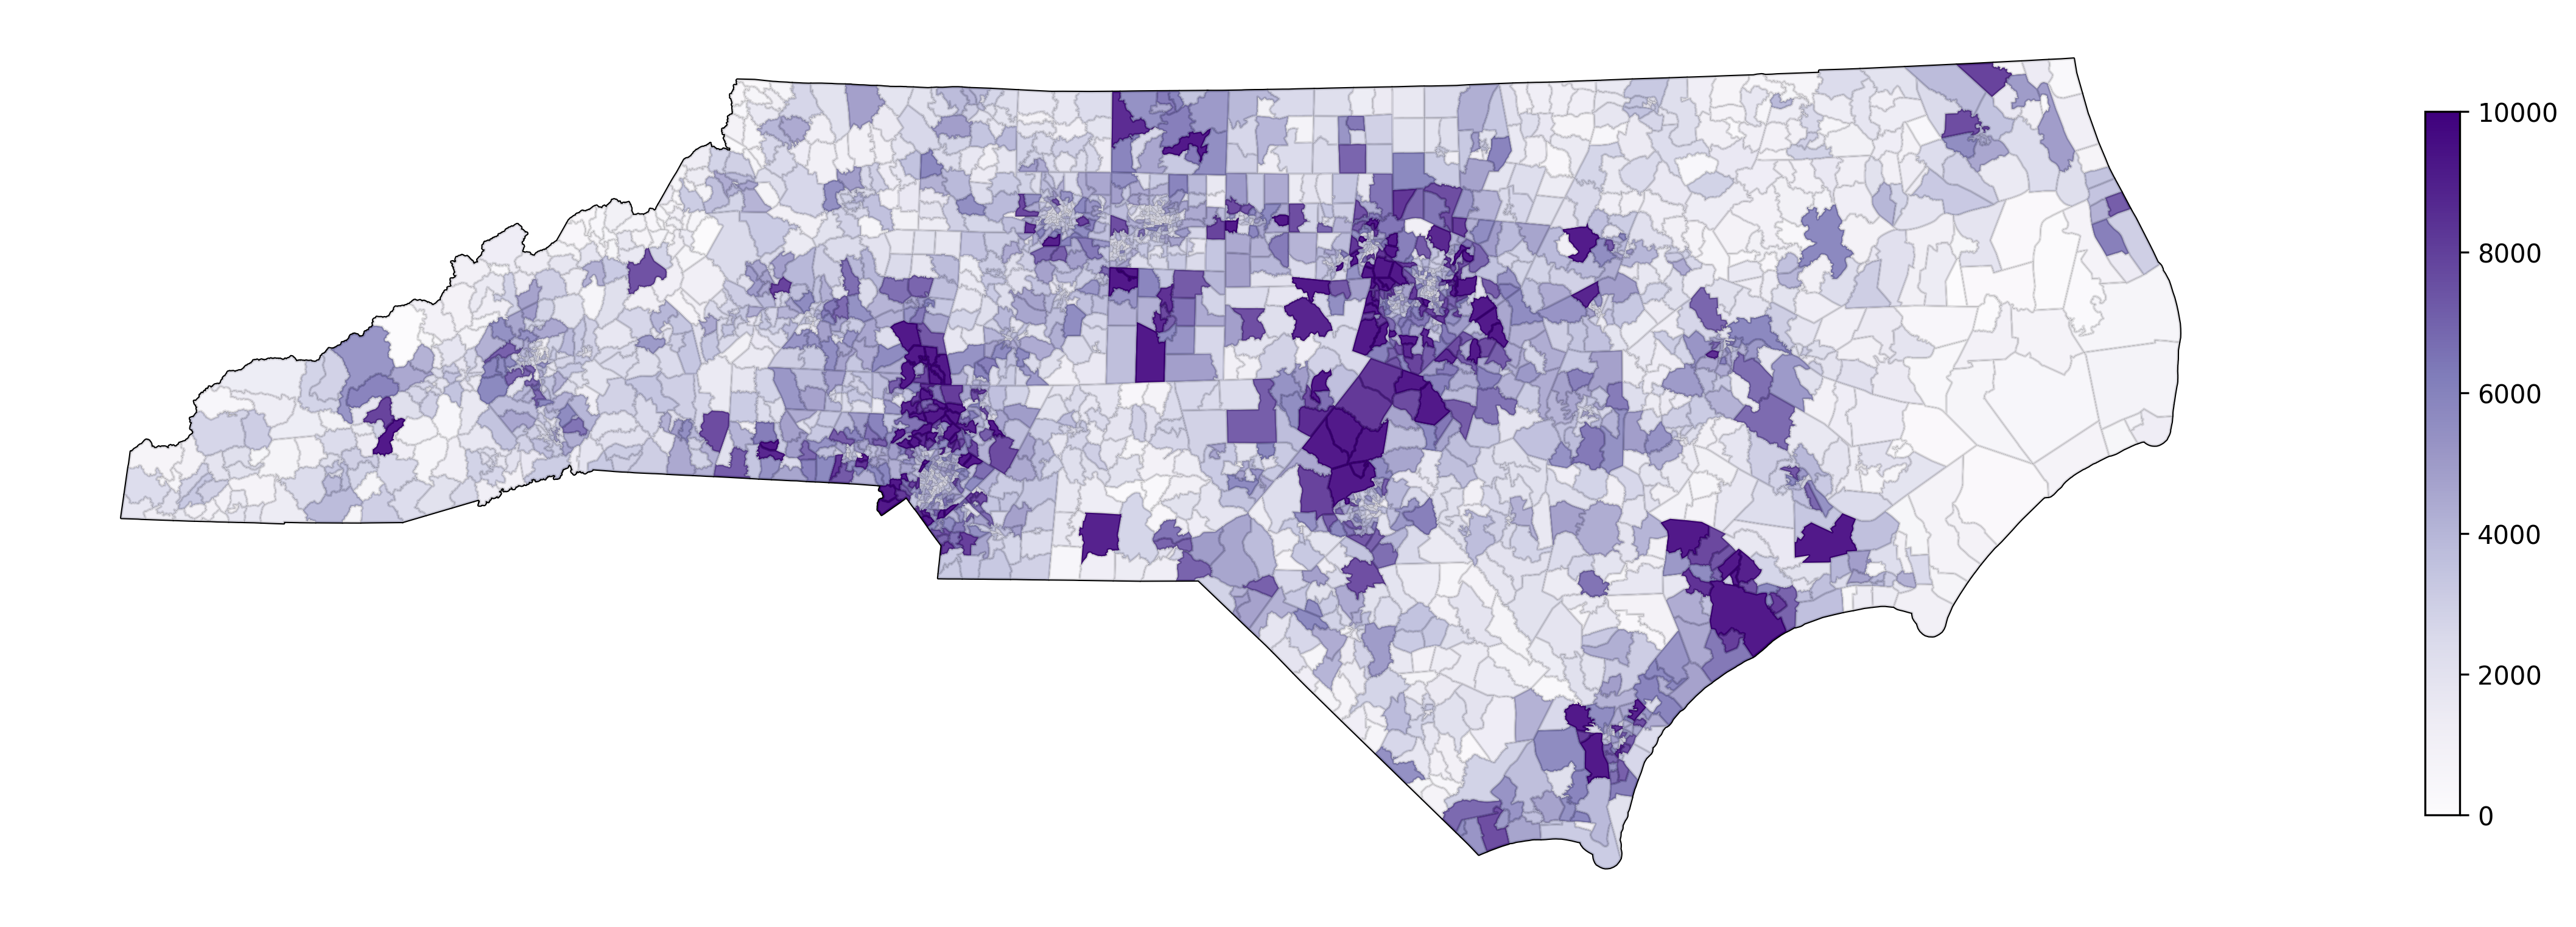

In [ ]:
# DPI (dots per inch) controls the resolution of the figure
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)


# Note: You build layers from the background to the foreground in matplotlib.
# so the first layer added to an ax object will be the background layer and subsequent 
# layers will be drawn on top of it.


# Add the lines to the background layer
gdf.plot(
    ax=ax,
    edgecolor='black',
    facecolor='none',
)

lower, upper = 0, 10_000
gdf.plot(
    column='total_pop_20',
    cmap='Purples', # Change the colormap to 'Purples' for a purple gradient
    legend=True, # Add the color bar legend
    vmin=lower, # Adjust the lower limit of the color scale
    vmax=upper,  # Adjust the upper limit of the color scale
    ax=ax,
    legend_kwds={
        "shrink": 0.5 # Adjust the size of the legend
    },
    alpha=0.9 # Adjust the transparency of the top layer
)

ax.spines[:].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

### Try it yourself!

Try plotting two choropleths on top of each other. One should be wvap_20 as a percent of the population
of the vtd (you will need to make a column for this) and the other should be the republican turnout
in the 2020 presidential election as a percent of the total turnout by precinct (this will
require another new column).